# Con un conjunto de datos de casas usadas en Chile obtenidas a través de webscrapping buscamos predecir el precio de una propiedad si ajustamos los parametros como baños, habitaciones, m^3, etc..

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to loadadd Codeadd Markdown


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/valor-casas-usadas-chile-rm-08032023/2023-03-08 Precios Casas RM.csv


In [2]:
#librerias
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model

In [3]:
#cargamos el dataframe y mostramos los 5 primeros
df = pd.read_csv('/kaggle/input/valor-casas-usadas-chile-rm-08032023/2023-03-08 Precios Casas RM.csv')
df2 = df
df.head()

,Price_CLP,Price_UF,Price_USD,Comuna,Ubicacion,Dorms,Baths,Built Area,Total Area,Parking,id,Realtor
0,409285000,11500,509695,QuintaNormal,Hoevel4548y4558,7,4.0,384.0,732.0,3.0,11700213,NaN
1,105000000,2950,130760,PedroAguirreCerda,Rucalhue,2,1.0,112.0,145.0,1.0,10894299,Legales y Propiedades SpA
2,128124000,3600,159557,EstaciónCentral,AvenidaLasParcelas,3,1.0,59.0,243.0,2.0,10257635,Propiedadesrs
3,75000000,2107,93400,Colina,PasajeGonzaloRojas,3,1.0,103.0,73.0,1.0,9232092,Patricio Gajardo propiedades
4,53000000,1489,66002,Colina,HernánDíazArrieta2820,2,1.0,57.0,67.0,1.0,7085397,Patricio Gajardo propiedades


In [4]:
#obtener variables descriptivas
df.describe()
#observamos un minimo de 1 en built area y total area, se considera erroneo

,Price_CLP,Price_UF,Price_USD,Dorms,Baths,Built Area,Total Area,Parking,id
count,7.779000e+03,7779.000000,7.779000e+03,7779.000000,7714.000000,7533.000000,7571.000000,5489.000000,7.779000e+03
mean,3.642481e+08,10234.571153,4.536091e+05,3.994087,2.653746,229.923669,807.919826,2.980506,9.910828e+06
std,3.868810e+08,10870.491584,4.817945e+05,1.622821,1.465103,1676.898812,9050.893115,17.749384,2.046317e+06
min,2.085000e+03,0.000000,3.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.213620e+06
25%,1.200000e+08,3372.000000,1.494400e+05,3.000000,2.000000,85.000000,129.500000,1.000000,8.563078e+06
50%,2.050000e+08,5760.000000,2.552930e+05,4.000000,2.000000,128.000000,210.000000,2.000000,1.054807e+07
75%,4.911420e+08,13800.000000,6.116340e+05,5.000000,3.000000,200.000000,443.000000,3.000000,1.152463e+07
max,5.516450e+09,155000.000000,6.869801e+06,27.000000,29.000000,120000.000000,678000.000000,1269.000000,1.234149e+07


In [5]:
#informacion del tipo de dato y valores no nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7779 entries, 0 to 7778
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price_CLP   7779 non-null   int64  
 1   Price_UF    7779 non-null   int64  
 2   Price_USD   7779 non-null   int64  
 3   Comuna      7779 non-null   object 
 4   Ubicacion   7779 non-null   object 
 5   Dorms       7779 non-null   int64  
 6   Baths       7714 non-null   float64
 7   Built Area  7533 non-null   float64
 8   Total Area  7571 non-null   float64
 9   Parking     5489 non-null   float64
 10  id          7779 non-null   int64  
 11  Realtor     7184 non-null   object 
dtypes: float64(4), int64(5), object(3)
memory usage: 729.4+ KB


In [6]:
#observamos valores dummies en la columna comuna
df['Comuna'].value_counts()

PuenteAlto           814
LasCondes            638
Maipú                630
Colina               553
LaFlorida            467
LoBarnechea          455
SanBernardo          309
Peñalolén            284
Santiago             279
LaReina              253
Vitacura             238
Ñuñoa                222
Lampa                177
Quilicura            168
Providencia          159
Pudahuel             158
Buin                 125
Huechuraba           122
EstaciónCentral      106
SanMiguel             99
Macul                 97
PadreHurtado          96
ElBosque              91
Peñaflor              89
Recoleta              86
LaCisterna            85
QuintaNormal          76
Independencia         70
Renca                 65
Talagante             64
Cerrillos             64
SanJoaquín            63
CerroNavia            53
LaGranja              53
LaPintana             51
PedroAguirreCerda     49
Conchalí              48
LoPrado               46
Melipilla             45
Paine                 41


In [7]:
#eliminamos columnas innecesarias como el vendedor, el id, la dirección, el precio en usd y clp
df = df.drop('Realtor', axis=1)
df = df.drop('id', axis=1)
df = df.drop('Ubicacion', axis=1)
df = df.drop('Price_USD', axis=1)
df = df.drop('Price_CLP', axis=1)


df.head()

,Price_UF,Comuna,Dorms,Baths,Built Area,Total Area,Parking
0,11500,QuintaNormal,7,4.0,384.0,732.0,3.0
1,2950,PedroAguirreCerda,2,1.0,112.0,145.0,1.0
2,3600,EstaciónCentral,3,1.0,59.0,243.0,2.0
3,2107,Colina,3,1.0,103.0,73.0,1.0
4,1489,Colina,2,1.0,57.0,67.0,1.0


In [8]:
#las variables faltantes las obtenemos con el promedio
promedio = df.mean()
df = df.fillna(promedio)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7779 entries, 0 to 7778
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price_UF    7779 non-null   int64  
 1   Comuna      7779 non-null   object 
 2   Dorms       7779 non-null   int64  
 3   Baths       7779 non-null   float64
 4   Built Area  7779 non-null   float64
 5   Total Area  7779 non-null   float64
 6   Parking     7779 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 425.5+ KB


/tmp/ipykernel_20/3203531256.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  promedio = df.mean()


In [9]:
#variables cualitativas a cuantitativas
df_encoded = pd.get_dummies(df['Comuna'])
df = pd.concat([df, df_encoded], axis=1)
df = df.drop('Comuna', axis=1)
df.head()

,Price_UF,Dorms,Baths,Built Area,Total Area,Parking,Buin,CaleradeTango,Cerrillos,CerroNavia,...,SanJoaquín,SanJosédeMaipo,SanMiguel,SanPedro,SanRamón,Santiago,Talagante,Tiltil,Vitacura,Ñuñoa
0,11500,7,4.0,384.0,732.0,3.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2950,2,1.0,112.0,145.0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3600,3,1.0,59.0,243.0,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2107,3,1.0,103.0,73.0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1489,2,1.0,57.0,67.0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Analisis de correlacion de variables

array([[<Axes: xlabel='Price_UF', ylabel='Price_UF'>,
        <Axes: xlabel='Dorms', ylabel='Price_UF'>,
        <Axes: xlabel='Baths', ylabel='Price_UF'>,
        <Axes: xlabel='Built Area', ylabel='Price_UF'>,
        <Axes: xlabel='Total Area', ylabel='Price_UF'>,
        <Axes: xlabel='Parking', ylabel='Price_UF'>],
       [<Axes: xlabel='Price_UF', ylabel='Dorms'>,
        <Axes: xlabel='Dorms', ylabel='Dorms'>,
        <Axes: xlabel='Baths', ylabel='Dorms'>,
        <Axes: xlabel='Built Area', ylabel='Dorms'>,
        <Axes: xlabel='Total Area', ylabel='Dorms'>,
        <Axes: xlabel='Parking', ylabel='Dorms'>],
       [<Axes: xlabel='Price_UF', ylabel='Baths'>,
        <Axes: xlabel='Dorms', ylabel='Baths'>,
        <Axes: xlabel='Baths', ylabel='Baths'>,
        <Axes: xlabel='Built Area', ylabel='Baths'>,
        <Axes: xlabel='Total Area', ylabel='Baths'>,
        <Axes: xlabel='Parking', ylabel='Baths'>],
       [<Axes: xlabel='Price_UF', ylabel='Built Area'>,
        <Axes:

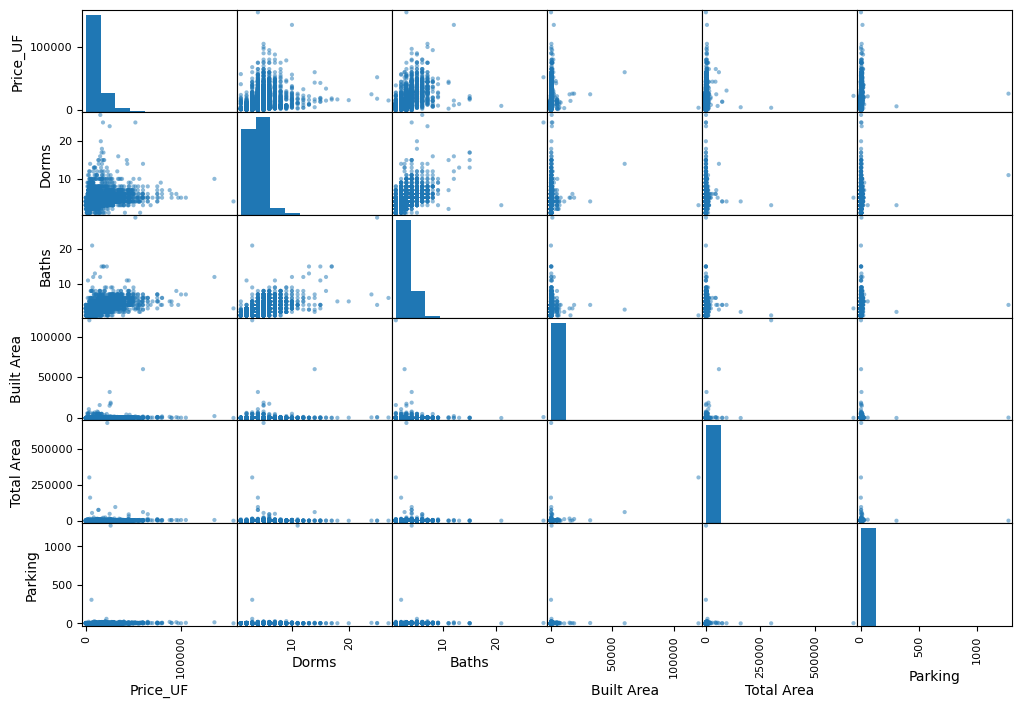

In [10]:
from pandas.plotting import scatter_matrix
atributos = ["Price_UF", "Dorms", "Baths", "Built Area", "Total Area", "Parking"]

scatter_matrix(df[atributos], figsize=(12,8))

Se observa una fuerte lineal relación en el precio y todas las variables

# Modelado

In [11]:
#definiendo la variable predictora
X, y = df.drop('Price_UF', axis=1), df['Price_UF']

In [12]:
#dividiendo los datos en train y test 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)


In [13]:
#Utilizaremos un modelo de regresión lineal
lr_multiple = linear_model.LinearRegression()

In [14]:
#entrenamiento del modelo
lr_multiple.fit(X_train, y_train)

LinearRegression()

In [15]:
print('DATOS DEL MODELO')
print()

print('Valor de las pendientes o coeficientes "a":')
print(lr_multiple.coef_)

DATOS DEL MODELO

Valor de las pendientes o coeficientes "a":
[ 2.79748602e+02  2.66005827e+03  2.54487384e-01  1.60864576e-02
  1.96585414e+01 -2.63355350e+03  5.44841330e+02 -2.16434239e+03
 -3.48558915e+03  3.00022507e+03 -2.64742593e+03 -1.17304193e+03
 -1.93804792e+03 -3.43793491e+03 -1.92050013e+03 -1.30275881e+03
 -4.95698010e+01 -1.47819016e+03 -1.18201790e+03 -1.44562920e+03
 -2.85367550e+03 -3.45879751e+03  6.12185926e+03 -3.18639546e+03
  1.07106357e+04  1.49569597e+04 -3.58550289e+03 -2.81500606e+03
 -7.90779749e+02 -3.03157311e+03 -3.85476522e+03 -2.93863112e+03
 -3.54127771e+03 -2.19475180e+03 -2.81545478e+03 -2.70211237e+03
 -2.46879174e+02  3.72941521e+03  6.41999446e+03 -2.65105691e+03
 -3.03979236e+03 -3.19445054e+03 -9.85835079e+02 -1.66176416e+03
 -3.04230506e+03 -2.71222320e+03 -1.96377145e+03  3.68018995e+03
  1.07483354e+03  2.25144725e+04 -2.46640296e+03 -6.43928205e+02
 -1.37345449e+03 -3.87714188e+03  1.51713659e+04  2.56153800e+03]


In [16]:
print('Valor de la intersección o coeficiente "b":')
print(lr_multiple.intercept_)

Valor de la intersección o coeficiente "b":
513.1239644717098


In [17]:
print('Precisión del modelo:')
print(lr_multiple.score(X_train, y_train))

Precisión del modelo:
0.6481302861164053


La precision baja se podría deber en su mayoria por los precios en las comunas con casas mas caras. Por ejemplo una casa en La Reina costará mucho pero esto no es necesario.

# Predicción

In [18]:
#realizacion de una prediccionX
Y_pred_multiple = lr_multiple.predict(X)
Y_pred_multiple= pd.DataFrame(Y_pred_multiple)
Y_pred_multiple

,0
0,12294.236237
1,967.718321
2,2150.168758
3,7059.698165
4,6768.146625
...,...
7774,26202.734749
7775,6759.788002
7776,31596.468855
7777,3624.591382


In [19]:
# Concatenando a df original
df2 = pd.concat([df2, Y_pred_multiple], axis=1)
display(df2)

,Price_CLP,Price_UF,Price_USD,Comuna,Ubicacion,Dorms,Baths,Built Area,Total Area,Parking,id,Realtor,0
0,409285000,11500,509695,QuintaNormal,Hoevel4548y4558,7,4.0,384.0,732.0,3.0,11700213,NaN,12294.236237
1,105000000,2950,130760,PedroAguirreCerda,Rucalhue,2,1.0,112.0,145.0,1.0,10894299,Legales y Propiedades SpA,967.718321
2,128124000,3600,159557,EstaciónCentral,AvenidaLasParcelas,3,1.0,59.0,243.0,2.0,10257635,Propiedadesrs,2150.168758
3,75000000,2107,93400,Colina,PasajeGonzaloRojas,3,1.0,103.0,73.0,1.0,9232092,Patricio Gajardo propiedades,7059.698165
4,53000000,1489,66002,Colina,HernánDíazArrieta2820,2,1.0,57.0,67.0,1.0,7085397,Patricio Gajardo propiedades,6768.146625
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7774,2491300000,70000,3102491,LasCondes,CalleSanJosédeLaSierra,5,5.0,600.0,1800.0,5.0,4708915,Propiedades Viña Limitada ®,26202.734749
7775,242012000,6800,301385,Peñalolén,PasajeMarNegro,4,2.0,124.0,200.0,1.0,6641660,NaN,6759.788002
7776,3736950000,105000,4653736,LasCondes,CaminoLasFlores/CaminoPiedraRoja,5,7.0,460.0,4925.0,8.0,6032811,Tsi Property,31596.468855
7777,569440000,16000,709141,LaPintana,LosCipreses/LosDuraznos,4,2.0,311.0,2011.0,1.0,5314376,Tsi Property,3624.591382


# Por ejemplos, en la fila 2. con un 64.81% de certeza una casa en estacion central, con 3 dormitorios, 2 baños, area construida de 59 m^3, area total de 243 m^3 y 2 estacionamientos, costaría 2150 UF